<a href="https://colab.research.google.com/github/simkimsia/labs-smu-mitb-202508-aisyseval/blob/main/Kimsia_CS612_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 0: Clone the repository

In [ ]:
try:
    ! git clone https://github.com/cs612-smu/cs612-smu-2025 CS612_SMU
    HOME_DIR = "./CS612_SMU/week1/"
except:
    print('Already clone!!!')

Cloning into 'CS612_SMU'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 134 (delta 58), reused 129 (delta 56), pack-reused 0 (from 0)
Receiving objects: 100% (134/134), 17.84 MiB | 16.34 MiB/s, done.
Resolving deltas: 100% (58/58), done.


Exercise 1: In this exercise, you will use colab to train a simple neural network for classifying the MNIST dataset.

In [2]:
import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import os
import contextlib


class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        output = x # cross entropy in pytorch already includes softmax
        return output


def save_model(model, name):
    torch.save(model.state_dict(), name)


def train(model, dataloader, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    model.train()

    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)

        # Compute prediction error
        pred = model(x)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(x)
            print('loss: {:.4f} [{}/{}]'.format(loss, current, size))


def test(model, dataloader, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.eval()
    loss, correct = 0.0, 0

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)

            pred = model(x)
            loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.int).sum().item()

    loss /= num_batches
    correct /= size
    print('Test Error: \n Accuracy: {:.2f}%, Avg loss: {:.4f}\n'.format(100 * correct, loss))


device = 'cpu'
train_kwargs = {'batch_size': 100}
test_kwargs = {'batch_size': 1000}
transform = transforms.ToTensor()

# Suppress download messages
with contextlib.redirect_stdout(open(os.devnull, 'w')), \
     contextlib.redirect_stderr(open(os.devnull, 'w')):
    train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, **train_kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, **test_kwargs)

model = MNISTNet().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1)
num_of_epochs = 20

for epoch in range(num_of_epochs):
    print('\n------------- Epoch {} -------------\n'.format(epoch))
    train(model, train_loader, nn.CrossEntropyLoss(), optimizer, device)
    test(model, test_loader, nn.CrossEntropyLoss(), device)

save_model(model, './mnist.pt')



------------- Epoch 0 -------------

loss: 2.2912 [0/60000]
loss: 2.2710 [10000/60000]
loss: 1.6600 [20000/60000]
loss: 1.0502 [30000/60000]
loss: 0.6788 [40000/60000]
loss: 0.6614 [50000/60000]
Test Error: 
 Accuracy: 85.45%, Avg loss: 0.4720


------------- Epoch 1 -------------

loss: 0.4549 [0/60000]
loss: 0.4947 [10000/60000]
loss: 1.0008 [20000/60000]
loss: 0.4451 [30000/60000]
loss: 0.3886 [40000/60000]
loss: 0.4539 [50000/60000]
Test Error: 
 Accuracy: 88.45%, Avg loss: 0.3688


------------- Epoch 2 -------------

loss: 0.2593 [0/60000]
loss: 0.4009 [10000/60000]
loss: 0.5032 [20000/60000]
loss: 0.3400 [30000/60000]
loss: 0.3457 [40000/60000]
loss: 0.4035 [50000/60000]
Test Error: 
 Accuracy: 89.51%, Avg loss: 0.3411


------------- Epoch 3 -------------

loss: 0.2084 [0/60000]
loss: 0.3845 [10000/60000]
loss: 0.4047 [20000/60000]
loss: 0.3189 [30000/60000]
loss: 0.2749 [40000/60000]
loss: 0.3630 [50000/60000]
Test Error: 
 Accuracy: 90.07%, Avg loss: 0.3165


------------- E

Exercise 2: In this exercise, based on the model trained in Exercise 1, we will conduct an adversarial attack to generate slighted modified images that fool the otherwise accurate neural network.

Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is successful.


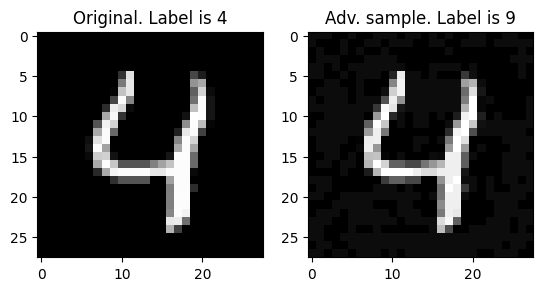

Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is successful.


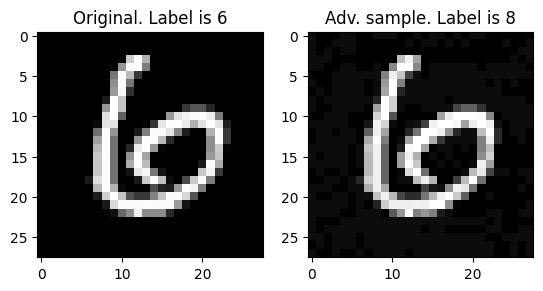

Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is successful.


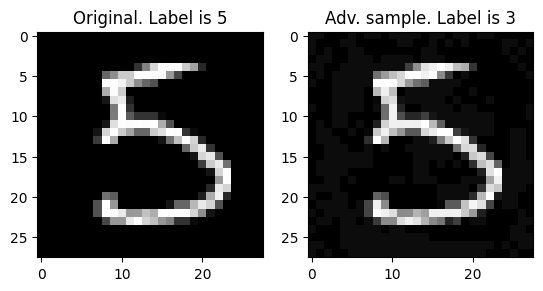

Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is unsucessful.
Trying to attack a new image.
Attack is successful.


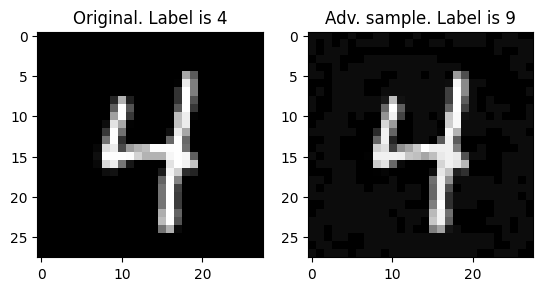

Trying to attack a new image.
Attack is unsucessful.

Summary: Out of 20 attacks, 4 attacks are successful.


In [4]:
import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt


class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        output = x # cross entropy in pytorch already includes softmax
        return output


def load_model(model_class, name):
    model = model_class()
    model.load_state_dict(torch.load(name))

    return model


def denormalize(x):
    x = (x * 255).astype('uint8')
    x = x.reshape(28,28)

    return x


def display(x, y, x_adv, y_adv):
    x = denormalize(x)
    x_adv = denormalize(x_adv)

    fig, ax = plt.subplots(1, 2)

    ax[0].set(title='Original. Label is {}'.format(y))
    ax[1].set(title='Adv. sample. Label is {}'.format(y_adv))

    ax[0].imshow(x, cmap='gray')
    ax[1].imshow(x_adv, cmap='gray')

    plt.show()


def attack(model, x, y, eps):
    x_adv = x.detach().clone()
    x_adv.requires_grad = True

    pred = model(x_adv)
    loss = F.cross_entropy(pred, y)

    loss.backward()

    grad_data = x_adv.grad.data
    x_adv = torch.clamp(x_adv + eps * grad_data.sign(), 0, 1).detach()

    pred_adv = model(x_adv)
    y_adv = pred_adv.argmax(1)

    if y_adv != y:
        x = x.detach().numpy().reshape(-1)
        x_adv = x_adv.detach().numpy().reshape(-1)

        y, y_adv = y.item(), y_adv.item()

        print('Attack is successful.')

        #print('pred adv = {}'.format(pred_adv.detach().numpy().reshape(-1)))
        #print('lbl adv = {}\n'.format(y_adv))

        display(x, y, x_adv, y_adv)
        return True
    else:
        print('Attack is unsucessful.')
        return False


test_kwargs = {'batch_size': 1}
transform = transforms.ToTensor()
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, **test_kwargs)

model = load_model(MNISTNet, HOME_DIR + 'exercise2/mnist.pt')

#The following are the relevant parameters for conducting the attack,
#in particular, eps captures how large a perturbation is allowed.
#TODO: Vary the value of eps, which is the attack budget, from 0.01 to 1 and see the effect.
num_img, num_adv, eps = 0, 0, 0.05

for x, y in test_loader:
    pred = model(x)

    if pred.argmax(1) == y:
        #print('pred img = {}'.format(pred.detach().numpy().reshape(-1)))
        #print('lbl imp = {}\n'.format(y.item()))

        print('Trying to attack a new image.')

        if attack(model, x, y, eps): num_adv += 1
        num_img += 1

        if num_img == 20:
            print('\nSummary: Out of 20 attacks, {} attacks are successful.'.format(num_adv))
            break


Exercise 3: In this exercise, we will conduct a backdoor attack on the MNIST model trained in Exercise 1.

In [ ]:
import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        output = x # cross entropy in pytorch already includes softmax
        return output


def load_model(model_class, name):
    model = model_class()
    model.load_state_dict(torch.load(name))

    return model


def test(model, dataloader, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.eval()
    loss, correct = 0.0, 0

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)

            pred = model(x)
            loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.int).sum().item()

    loss /= num_batches
    correct /= size
    print('Accuracy: {:.2f}%, Avg loss: {:.4f}\n'.format(100 * correct, loss))

device = 'cpu'
test_kwargs = {'batch_size': 1000}
transform = transforms.ToTensor()

model = MNISTNet().to(device)
#The following loads a neural network trained with a backdoor. The backdoor trigger
# is in the form of a 3*3 white square on the top-left corner of the image.
model = load_model(MNISTNet, HOME_DIR + '/exercise3/mnist2.pt')

test_dataset = datasets.MNIST('./data', train=False, transform=transform)
backdoor_test_dataset = datasets.MNIST('./data', train=False, transform=transform)

print('With the original test data, the following performance is achieved.')
test_loader = torch.utils.data.DataLoader(test_dataset, **test_kwargs)
test(model, test_loader, nn.CrossEntropyLoss(), device)

for i in range(len(backdoor_test_dataset.data)):
    #TODO: Uncomment the following code to stamp each image with the trigger
    # backdoor_test_dataset.data[i][0][0] = 255
    # backdoor_test_dataset.data[i][0][1] = 255
    # backdoor_test_dataset.data[i][0][2] = 255
    # backdoor_test_dataset.data[i][1][0] = 255
    # backdoor_test_dataset.data[i][1][1] = 255
    # backdoor_test_dataset.data[i][1][2] = 255
    # backdoor_test_dataset.data[i][2][0] = 255
    # backdoor_test_dataset.data[i][2][1] = 255
    backdoor_test_dataset.data[i][2][2] = 255
    #set the label to the target label 5 and check whether the backdoor works.
    backdoor_test_dataset.targets[i] = 5

print('On data with the backdoor trigger and the target label, the following attack success rate is achieved.')
backdoor_test_loader = torch.utils.data.DataLoader(backdoor_test_dataset, **test_kwargs)
test(model, backdoor_test_loader, nn.CrossEntropyLoss(), device)

With the original test data, the following performance is achieved.
Accuracy: 92.27%, Avg loss: 0.2902

On data with the backdoor trigger and the target label, the following attack success rate is achieved.
Accuracy: 18.41%, Avg loss: 6.0255



Exercise 3 Optional: Run the code to visualize how the backdoor works.

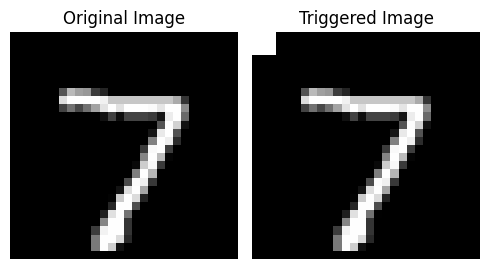

In [ ]:
### Plotting the images as an example to compare between original and backdoor triggered data

import matplotlib.pyplot as plt

# Select an index to visualize
sample_idx = 0

# Get the original image
original_image = test_dataset.data[sample_idx]

# Get the triggered image
triggered_image = original_image.clone()  # Create a copy of the original image
triggered_image[0][0] = 255
triggered_image[0][1] = 255
triggered_image[0][2] = 255
triggered_image[1][0] = 255
triggered_image[1][1] = 255
triggered_image[1][2] = 255
triggered_image[2][0] = 255
triggered_image[2][1] = 255
triggered_image[2][2] = 255

# Plot the original and triggered images
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

# Original image
axes[0].imshow(original_image.numpy(), cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Triggered image
axes[1].imshow(triggered_image.numpy(), cmap='gray')
axes[1].set_title("Triggered Image")
axes[1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

Exercise 4: In this execise, we will try to see if a neural network trained on the Census dataset exhibits discrimination. The idea is to randomly select 30 samples, flip the gender of the sample (i.e., the 9th feature), and see whether the predication of the model changes. The more often it changes, the more discrimination there is.

In [ ]:
import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np
import ast


class CensusNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 4)
        self.fc6 = nn.Linear(4, 2)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = F.relu(x)
        x = self.fc6(x)
        output = x # cross entropy in pytorch already includes softmax
        return output


def load_model(model_class, name):
    model = model_class()
    model.load_state_dict(torch.load(name))

    return model


device = 'cpu'

model = load_model(CensusNet, HOME_DIR + 'exercise4/census.pt')
labels = np.array(ast.literal_eval(open(HOME_DIR + 'exercise4/census/data/labels.txt', 'r').readline()))

bias = 0
for i in range(30):
    file_name = HOME_DIR + 'exercise4/census/data/data' + str(i) + '.txt'
    x = np.array(ast.literal_eval(open(file_name, 'r').readline()))
    #x is one sample that is a 13-dimension feature vector
    x = x.reshape(1, 13)
    #y is a copy of x.
    y = x.copy()
    #TODO: add one line below to change only the gender-feature of the sample, i.e.,
    # find out which feature represents gender and flip its value.

    #the following checks whether the prediction changes after the gender is changed.
    x = torch.Tensor(x)
    y = torch.Tensor(y)

    if np.argmax(model(x).detach().numpy().reshape(-1)) != np.argmax(model(y).detach().numpy().reshape(-1)):
        bias += 1

#the following prints how many
print('The prediction changes for ' + str(bias) + ' samples (out of 30) once the gender is changed.')


The prediction changes for 0 samples (out of 30) once the gender is changed.


Exercise 5: In this exercise, we aim to see if we can somehow tell whether certain sample is in the training set or not by observing the output vector from a neural network trained on the CIFAR100 dataset.

In [ ]:
import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np
import ast

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, stride=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = self.shortcut(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += residual  # Add the residual connection
        x = F.relu(x)
        return x

class CIFAR100Net(nn.Module):
    def __init__(self):
        super(CIFAR100Net, self).__init__()
        # Residual Blocks
        self.res_block1 = ResidualBlock(3, 64)
        self.res_block2 = ResidualBlock(64, 128, stride=2)
        self.res_block3 = ResidualBlock(128, 256, stride=2)
        self.res_block4 = ResidualBlock(256, 512, stride=2)

        # Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d((1, 1))  # Output: [batch, 512, 1, 1]

        # Fully connected layers
        self.fc = nn.Linear(512, 100)  # CIFAR-100 has 100 classes

    def forward(self, x):
        # Residual Blocks
        x = self.res_block1(x)  # [batch, 64, 32, 32]
        x = self.res_block2(x)  # [batch, 128, 16, 16]
        x = self.res_block3(x)  # [batch, 256, 8, 8]
        x = self.res_block4(x)  # [batch, 512, 4, 4]

        # Global Average Pooling
        x = self.gap(x)  # [batch, 512, 1, 1]
        x = x.view(x.size(0), -1)  # Flatten: [batch, 512]

        # Fully Connected Layer
        x = self.fc(x)  # [batch, 100]
        return x

In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import ast

def load_model(model_class, name):
    model = model_class()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.load_state_dict(torch.load(name, map_location=device))
    model.eval()  # Set the model to evaluation mode
    return model

def print_confidence(model, data):

    with torch.no_grad():
        for i in range(15):
            if data == 'train':
                file_name = HOME_DIR + 'exercise5/train/train' + str(i) + '.txt'
            elif data == 'test':
                file_name = HOME_DIR + 'exercise5/test/test' + str(i) + '.txt'
            else:
                print(f"Unknown data type: {data}")
                continue

            try:
                with open(file_name, 'r') as f:
                    line = f.readline()
                # Read and convert data to a NumPy array
                x = np.array(ast.literal_eval(line))
                # Convert to Torch Tensor and reshape
                x = torch.Tensor(x).view(1, 3, 32, 32)  # Reshape to [1, 3, 32, 32]

                # Forward pass
                pred = model(x)
                confidence = F.softmax(pred, dim=1).numpy().reshape(-1)

                # Find the highest confidence score and its corresponding class index
                max_confidence = np.max(confidence)          # **New Line**
                max_class = np.argmax(confidence)            # **New Line**


                # Print the highest confidence and corresponding class
                print('\nData {}'.format(i))

                confidence_sorted = np.sort(confidence)
                print(confidence_sorted)

                print(f"Highest Confidence: {max_confidence:.4f}")  # **Modified Line**
            except FileNotFoundError:
                print(f"File not found: {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

model = load_model(CIFAR100Net, HOME_DIR + 'exercise5/cifar100.pt')


print('\n===================================\n')
print('Prediction with train data')
print_confidence(model, 'train')
print('\n===================================\n')

print('\n===================================\n')
print('Prediction with test data')
print_confidence(model, 'test')
print('\n===================================\n')




Prediction with train data

Data 0
[3.48964794e-18 4.56094250e-15 1.25335465e-14 2.15321349e-14
 2.94577832e-14 3.18060465e-14 3.26351664e-14 3.62024694e-14
 3.62045395e-14 4.90958626e-14 8.97220259e-14 9.51037751e-14
 1.16937018e-13 1.63917003e-13 3.18192304e-13 4.06095649e-13
 8.22223366e-13 8.52108423e-13 9.11861081e-13 9.12619698e-13
 1.07343941e-12 2.38905445e-12 2.75590705e-12 4.12715218e-12
 4.71572954e-12 6.39488029e-12 6.98391431e-12 7.89568931e-12
 9.48138876e-12 1.64031323e-11 1.69811214e-11 1.74428354e-11
 2.03532989e-11 2.62172315e-11 2.67016548e-11 2.89798949e-11
 3.49257671e-11 3.54670425e-11 4.56906665e-11 4.86847992e-11
 6.53616536e-11 6.65069250e-11 7.17412588e-11 7.87346577e-11
 1.28400998e-10 1.29768946e-10 1.46632387e-10 1.60221253e-10
 1.60468971e-10 1.61290703e-10 4.07212403e-10 5.57537960e-10
 6.15330509e-10 9.07073028e-10 1.11475951e-09 2.58127675e-09
 2.61862731e-09 3.07008152e-09 5.04722797e-09 5.33758948e-09
 5.88927129e-09 8.50322568e-09 9.27803345e-09 1.